<a href="https://colab.research.google.com/github/hm02022003/smart-home-iot-automation/blob/main/Mahdi_Houshangi_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 10000 Mahdi_Houshangi_sampled_smart_home_dataset.csv to 10000 Mahdi_Houshangi_sampled_smart_home_dataset.csv


In [3]:
import pandas as pd

In [7]:
import pandas as pd

df = pd.read_csv('10000 Mahdi_Houshangi_sampled_smart_home_dataset.csv')


In [9]:
df.columns


Index(['Datetime', 'Transaction_ID', 'Television', 'Dryer', 'Oven',
       'Refrigerator', 'Microwave', 'Line Voltage', 'Voltage',
       'Apparent Power', 'Energy Consumption (kWh)', 'Month',
       'Day of the Week', 'Hour of the Day', 'Offloading Decision',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [13]:
import pandas as pd

# فرض بر اینکه فایل قبلاً آپلود شده و اسمش مشخصه:
df = pd.read_csv('10000 Mahdi_Houshangi_sampled_smart_home_dataset.csv')

# تبدیل ستون 'Datetime' به نوع datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# استخراج ویژگی‌های زمانی
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['month'] = df['Datetime'].dt.month


In [14]:
import pandas as pd

# بارگذاری داده
df = pd.read_csv('10000 Mahdi_Houshangi_sampled_smart_home_dataset.csv')

# تبدیل زمان و استخراج ویژگی‌ها
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['month'] = df['Datetime'].dt.month

# آماده‌سازی داده برای مدل‌سازی
features = ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 'hour', 'dayofweek', 'month']
target = 'Offloading Decision'

X = df[features]
y = df[target]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# تبدیل Label به عدد
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree, target_names=le.classes_))

# استخراج قوانین به صورت متن
rules = export_text(tree, feature_names=features)
print(rules)


              precision    recall  f1-score   support

       Local       0.49      0.51      0.50      1003
      Remote       0.49      0.48      0.48       997

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

|--- dayofweek <= -0.76
|   |--- hour <= -1.14
|   |   |--- month <= -0.26
|   |   |   |--- Microwave <= 0.01
|   |   |   |   |--- Television <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Television >  0.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- Microwave >  0.01
|   |   |   |   |--- dayofweek <= -1.26
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- dayofweek >  -1.26
|   |   |   |   |   |--- class: 0
|   |   |--- month >  -0.26
|   |   |   |--- hour <= -1.58
|   |   |   |   |--- month <= 0.63
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- month >  0.63
|   |   |   |   |   |--- class: 0
|   |   |   |--- hour >  -1.58
|   

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

              precision    recall  f1-score   support

       Local       0.51      0.52      0.51      1003
      Remote       0.50      0.49      0.50       997

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



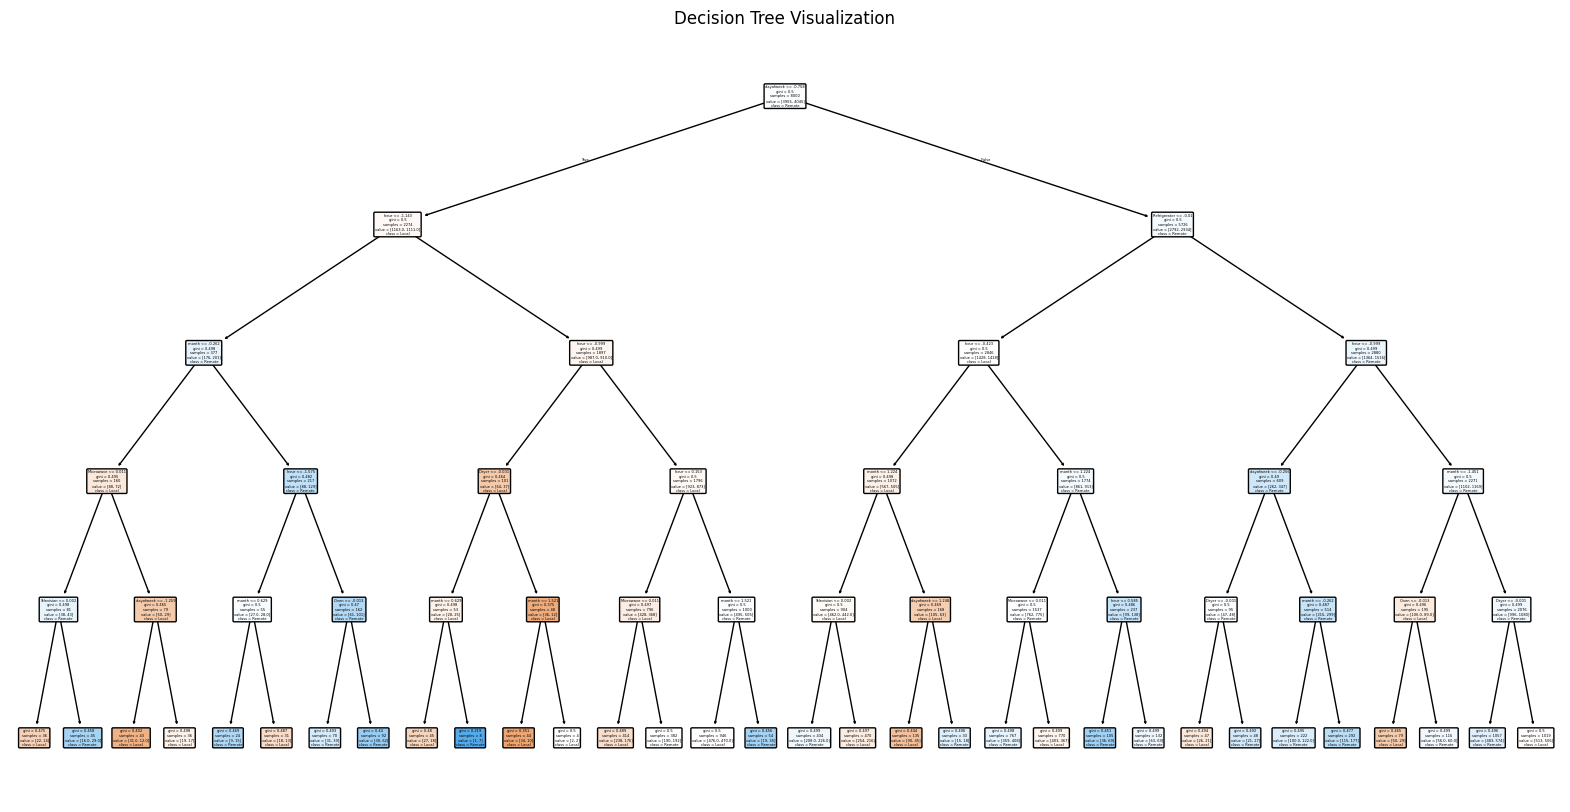

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=le.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))


              precision    recall  f1-score   support

       Local       0.49      0.51      0.50      1003
      Remote       0.48      0.46      0.47       997

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [24]:
def advanced_smart_recommendation(row):
    # Rule 1: Peak Hour Appliance Usage (using 18:00 as peak hour start)
    if row['hour'] >= 18 and (row['Television'] == 1 or row['Oven'] == 1 or row['Dryer'] == 1):
        if (row['Television'] + row['Oven'] + row['Dryer'] + row['Refrigerator'] + row['Microwave']) >= 2: # Check if at least two major appliances are on
             return "High load expected during peak hours. Consider reducing usage or offloading tasks."

    # Rule 2: Simultaneous High-Power Appliance Usage
    if row['Oven'] == 1 and row['Dryer'] == 1:
        return "High power appliances running simultaneously. Recommend staggering usage."
    elif row['Oven'] == 1 and row['Microwave'] == 1:
         return "High power appliances running simultaneously. Recommend staggering usage."

    # Rule 4: Television and Microwave during Peak Hours (from your original function)
    if row['hour'] >= 18 and row['Television'] == 1 and row['Microwave'] == 1:
        return "High load expected. Recommend Offloading." # This could be refined or combined with Rule 1

    # If none of the specific high-load conditions are met
    return "No action needed."

# Apply the new function to your DataFrame
df['Advanced Recommendation'] = df.apply(advanced_smart_recommendation, axis=1)

# Display the recommendations
print(df[['Datetime', 'Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 'hour', 'Advanced Recommendation']].head())

             Datetime  Television  Dryer  Oven  Refrigerator  Microwave  hour  \
0 2022-07-26 17:56:00           1      0     0             0          1    17   
1 2021-02-15 05:33:00           1      1     0             0          1     5   
2 2022-02-15 08:32:00           1      1     1             0          1     8   
3 2022-01-12 02:29:00           0      1     0             1          0     2   
4 2021-01-24 07:15:00           0      0     1             0          1     7   

                             Advanced Recommendation  
0                                  No action needed.  
1                                  No action needed.  
2  High power appliances running simultaneously. ...  
3                                  No action needed.  
4  High power appliances running simultaneously. ...  


In [25]:
import pandas as pd

# Create a list of dictionaries, where each dictionary represents a rule
rules_list = [
    {
        "Rule ID": 1,
        "Conditions": "Peak hour (>= 6 PM) AND usage of high-power appliance (Television OR Oven OR Dryer) AND at least two major appliances (Television, Oven, Dryer, Refrigerator, Microwave) are ON.",
        "Recommendation": "High load expected during peak hours. Consider reducing usage or offloading tasks."
    },
    {
        "Rule ID": 2,
        "Conditions": "Oven is ON AND Dryer is ON.",
        "Recommendation": "High power appliances running simultaneously. Recommend staggering usage."
    },
    {
        "Rule ID": 3,
        "Conditions": "Oven is ON AND Microwave is ON.",
        "Recommendation": "High power appliances running simultaneously. Recommend staggering usage."
    },
    {
        "Rule ID": 4,
        "Conditions": "Peak hour (>= 6 PM) AND Television is ON AND Microwave is ON.",
        "Recommendation": "High load expected. Recommend Offloading."
    },
    {
        "Rule ID": 5,
        "Conditions": "None of the specific high-load conditions are met.",
        "Recommendation": "No action needed."
    }
]

# Create a pandas DataFrame from the list of rules
rules_table = pd.DataFrame(rules_list)

# Display the table
display(rules_table)

,Rule ID,Conditions,Recommendation
0,1,Peak hour (>= 6 PM) AND usage of high-power ap...,High load expected during peak hours. Consider...
1,2,Oven is ON AND Dryer is ON.,High power appliances running simultaneously. ...
2,3,Oven is ON AND Microwave is ON.,High power appliances running simultaneously. ...
3,4,Peak hour (>= 6 PM) AND Television is ON AND M...,High load expected. Recommend Offloading.
4,5,None of the specific high-load conditions are ...,No action needed.


from matplotlib import pyplot as plt
rules_table['Rule ID'].plot(kind='hist', bins=20, title='Rule ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
rules_table.groupby('Conditions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
rules_table.groupby('Recommendation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Rule ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Rule ID'}, axis=1)
              .sort_values('Rule ID', ascending=True))
  xs = counted['Rule ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rules_table.sort_values('Rule ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Conditions')):
  _plot_series(series, series_name, i)
  fig.legend(title='Conditions', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rule ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Rule ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Rule ID'}, axis=1)
              .sort_values('Rule ID', ascending=True))
  xs = counted['Rule ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rules_table.sort_values('Rule ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Recommendation')):
  _plot_series(series, series_name, i)
  fig.legend(title='Recommendation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rule ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
rules_table['Rule ID'].plot(kind='line', figsize=(8, 4), title='Rule ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Recommendation'].value_counts()
    for x_label, grp in rules_table.groupby('Conditions')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Conditions')
_ = plt.ylabel('Recommendation')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rules_table['Conditions'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rules_table, x='Rule ID', y='Conditions', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rules_table['Recommendation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rules_table, x='Rule ID', y='Recommendation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [26]:
def advanced_smart_recommendation(row):
    # Rule 1: Peak Hour Appliance Usage (using 18:00 as peak hour start)
    if row['hour'] >= 18 and (row['Television'] == 1 or row['Oven'] == 1 or row['Dryer'] == 1):
        if (row['Television'] + row['Oven'] + row['Dryer'] + row['Refrigerator'] + row['Microwave']) >= 2: # Check if at least two major appliances are on
             return "High load expected during peak hours. Consider reducing usage or offloading tasks."

    # Rule 2: Simultaneous High-Power Appliance Usage
    if row['Oven'] == 1 and row['Dryer'] == 1:
        return "High power appliances running simultaneously. Recommend staggering usage."
    elif row['Oven'] == 1 and row['Microwave'] == 1:
         return "High power appliances running simultaneously. Recommend staggering usage."

    # Rule 4: Television and Microwave during Peak Hours (from your original function)
    if row['hour'] >= 18 and row['Television'] == 1 and row['Microwave'] == 1:
        return "High load expected. Recommend Offloading." # This could be refined or combined with Rule 1

    # If none of the specific high-load conditions are met
    return "No action needed."

# Apply the new function to your DataFrame
df['Advanced Recommendation'] = df.apply(advanced_smart_recommendation, axis=1)

# Display the recommendations
print(df[['Datetime', 'Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 'hour', 'Advanced Recommendation']].head())

             Datetime  Television  Dryer  Oven  Refrigerator  Microwave  hour  \
0 2022-07-26 17:56:00           1      0     0             0          1    17   
1 2021-02-15 05:33:00           1      1     0             0          1     5   
2 2022-02-15 08:32:00           1      1     1             0          1     8   
3 2022-01-12 02:29:00           0      1     0             1          0     2   
4 2021-01-24 07:15:00           0      0     1             0          1     7   

                             Advanced Recommendation  
0                                  No action needed.  
1                                  No action needed.  
2  High power appliances running simultaneously. ...  
3                                  No action needed.  
4  High power appliances running simultaneously. ...  


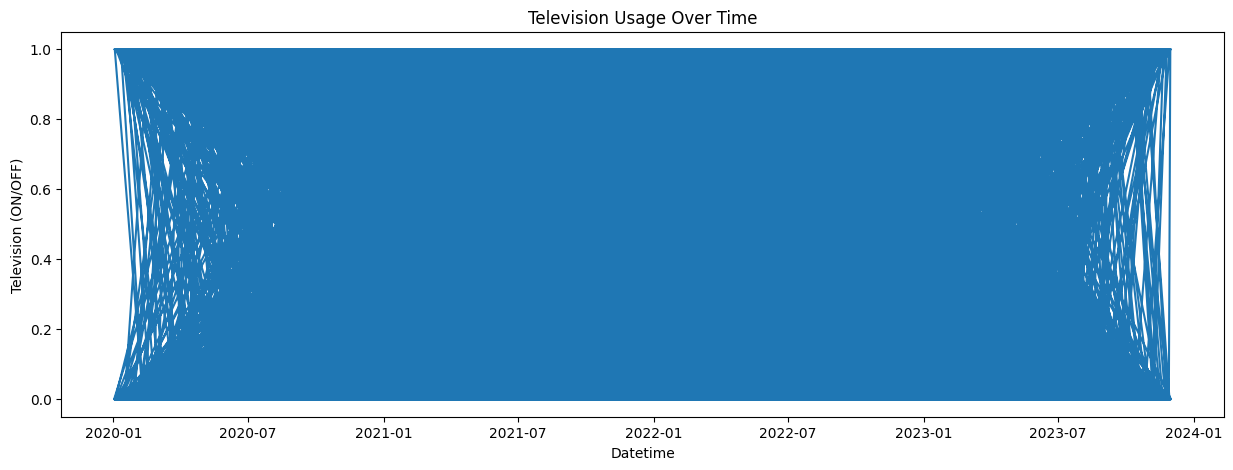

            Transaction_ID  Television  Dryer  Oven  Refrigerator  Microwave  \
Datetime                                                                       
2020-01-01              32           0      1     0             0          0   
2020-01-02             476           5      5     4             3          5   
2020-01-03             790           3      6     5             6          6   
2020-01-04             836           4      3     2             3          1   
2020-01-05             612           2      1     2             0          3   

            Line Voltage  Voltage  Apparent Power  Energy Consumption (kWh)  \
Datetime                                                                      
2020-01-01           236      228            1516                 54.082998   
2020-01-02          1813     1767           14301                518.100452   
2020-01-03          2048     2003           14777                364.696778   
2020-01-04          1627     1593           

In [27]:
# Example: Plotting a specific appliance usage over time
plt.figure(figsize=(15, 5))
plt.plot(df['Datetime'], df['Television'])
plt.title('Television Usage Over Time')
plt.xlabel('Datetime')
plt.ylabel('Television (ON/OFF)')
plt.show()

# Example: Calculating rolling mean of a feature
df['Television_rolling_mean_24h'] = df['Television'].rolling(window=24).mean()

# Example: Resampling data to daily frequency and summing appliance usage
daily_usage = df.resample('D', on='Datetime').sum()
print(daily_usage.head())

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example: Prepare data for clustering by day
daily_aggregated = df.resample('D', on='Datetime').agg({
    'Television': 'sum',
    'Dryer': 'sum',
    'Oven': 'sum',
    'Refrigerator': 'sum',
    'Microwave': 'sum',
    'hour': 'mean', # Or other aggregation for time features
    'dayofweek': 'first' # Or other aggregation
}).dropna()

# Scale the aggregated data
scaler_cluster = StandardScaler()
scaled_daily_data = scaler_cluster.fit_transform(daily_aggregated)

# Apply K-Means clustering (choose the number of clusters based on domain knowledge or elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_aggregated['cluster'] = kmeans.fit_predict(scaled_daily_data)

# Analyze the clusters (e.g., mean appliance usage in each cluster)
print(daily_aggregated.groupby('cluster').mean())

         Television     Dryer      Oven  Refrigerator  Microwave       hour  \
cluster                                                                       
0          2.423404  2.482979  2.521277      2.453191   2.368085  11.500588   
1          4.980687  4.993562  5.004292      5.053648   5.017167  11.576981   
2          3.126016  3.038618  3.168699      3.115854   3.048780  11.205001   

         dayofweek  
cluster             
0         4.491489  
1         3.390558  
2         1.201220  


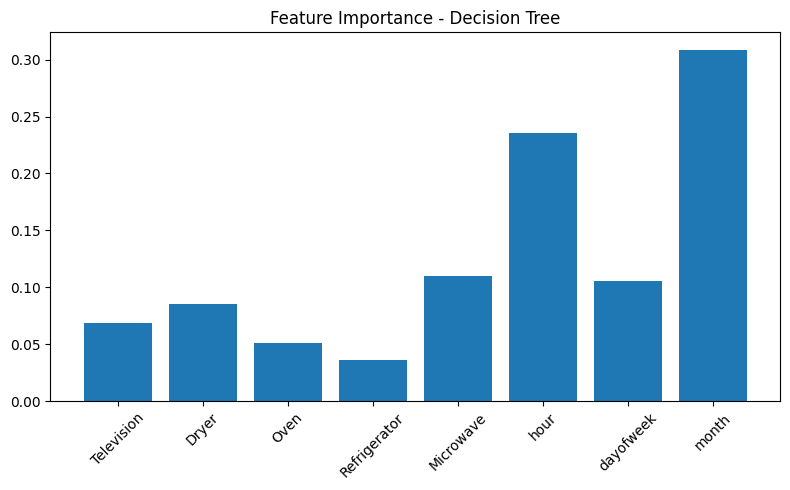

In [18]:
import matplotlib.pyplot as plt

importances = tree.feature_importances_
plt.figure(figsize=(8,5))
plt.bar(features, importances)
plt.title("Feature Importance - Decision Tree")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


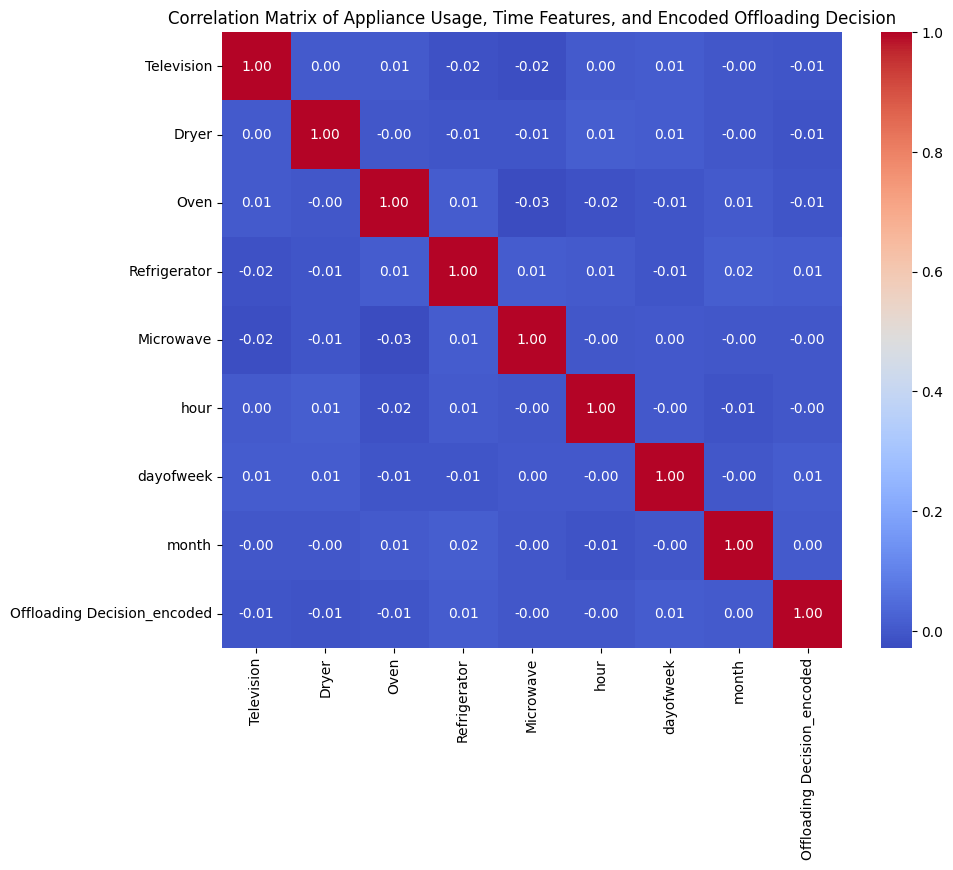

In [30]:
# Make sure y_encoded is available from your previous steps
# If not, run the LabelEncoder part again:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_encoded = le.fit_transform(df[target])

# Add the encoded target to your DataFrame temporarily for correlation calculation
df['Offloading Decision_encoded'] = y_encoded

# Select features for correlation analysis, including the encoded target
correlation_features = ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 'hour', 'dayofweek', 'month', 'Offloading Decision_encoded']

# Calculate the correlation matrix
correlation_matrix = df[correlation_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Appliance Usage, Time Features, and Encoded Offloading Decision')
plt.show()

# Optional: Drop the temporary encoded column
df = df.drop('Offloading Decision_encoded', axis=1)

In [31]:
# Descriptive statistics for numerical columns (appliance usage as 0/1 and time features)
print("Descriptive Statistics:")
print(df[['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 'hour', 'dayofweek', 'month']].describe())

# Value counts for categorical columns (appliance status and offloading decision)
print("\nValue Counts for Appliance Status:")
for col in ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']:
    print(f"\n{col}:")
    print(df[col].value_counts())

print("\nValue Counts for Offloading Decision:")
print(df['Offloading Decision'].value_counts())

Descriptive Statistics:
         Television         Dryer          Oven  Refrigerator     Microwave  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.499800      0.498900      0.507600      0.504100      0.495100   
std        0.500025      0.500024      0.499967      0.500008      0.500001   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      1.000000      1.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               hour     dayofweek         month  
count  10000.000000  10000.000000  10000.000000  
mean      11.435500      3.007100      6.394800  
std        6.930458      1.995858      3.362271  
min        0.000000      0.000000      1.000000  
25%        5.0

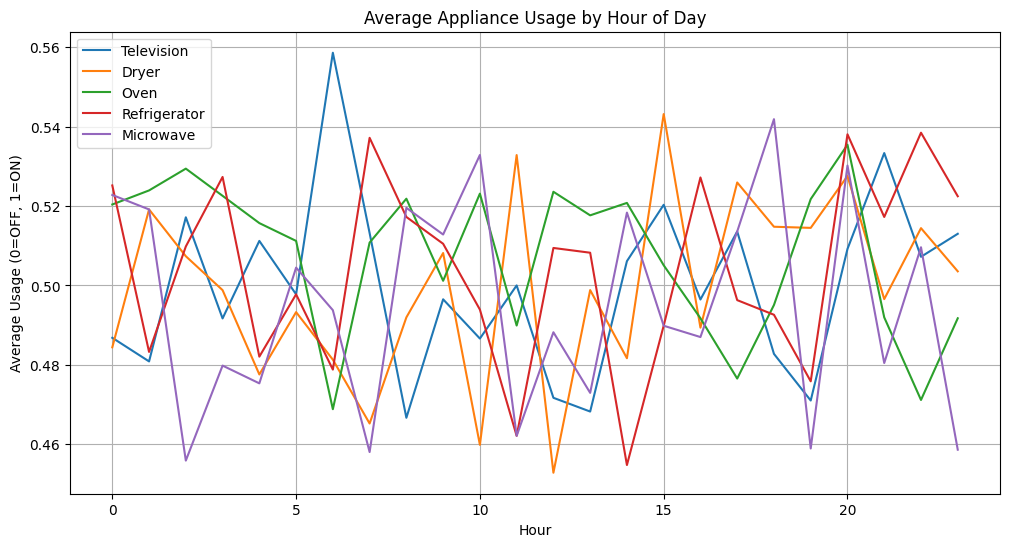

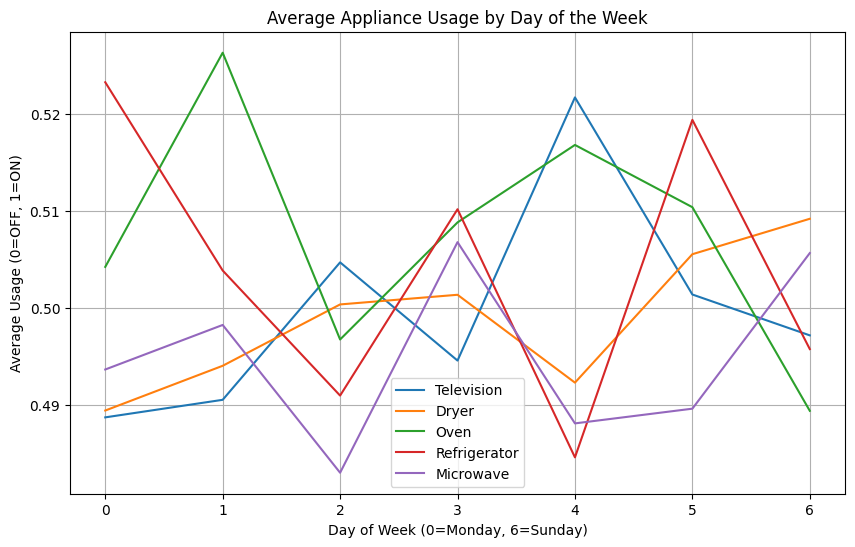

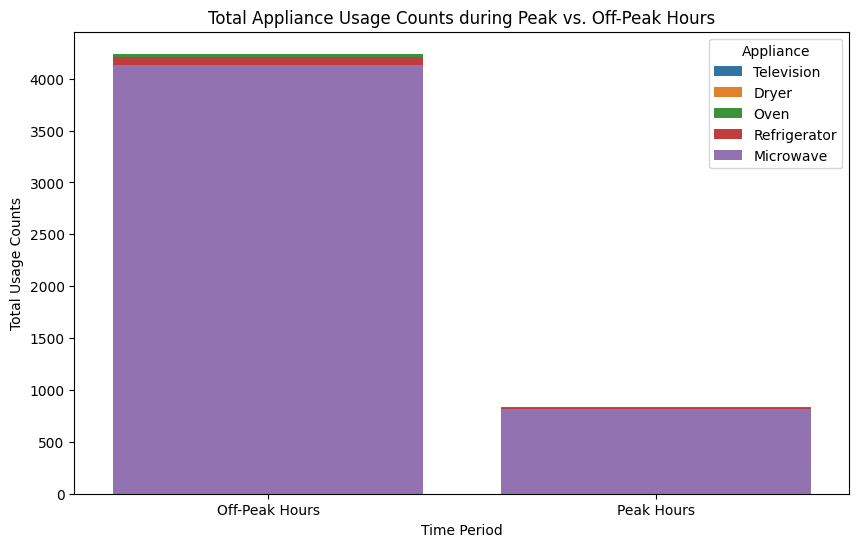

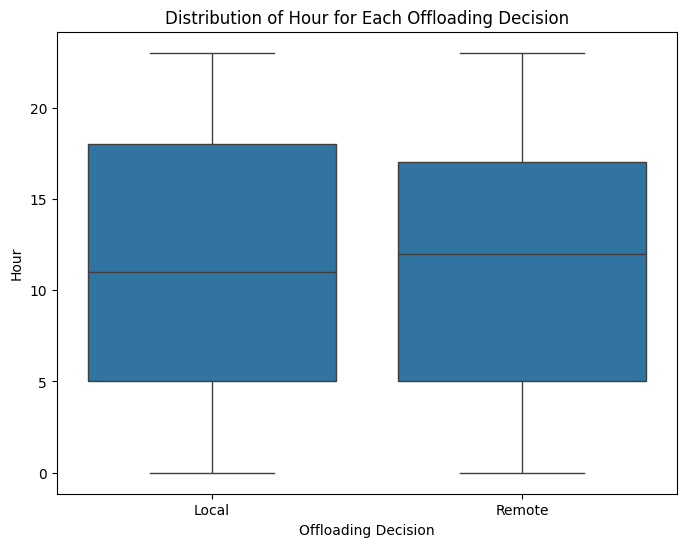

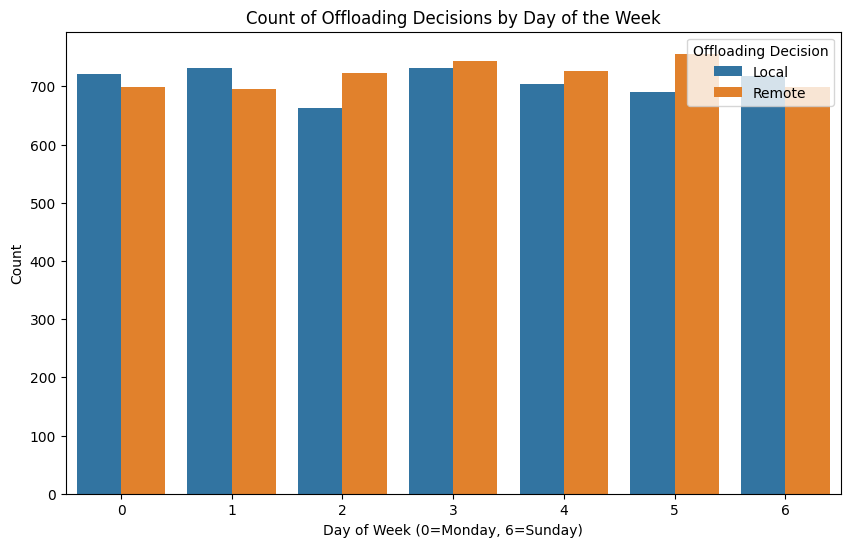

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Histogram of 'Offloading Decision' by Hour (You already have this one)
fig = px.histogram(df, x='hour', color='Offloading Decision', barmode='group')
fig.update_layout(title='Offloading by Hour of Day')
fig.show()

# 2. Average Appliance Usage by Hour
appliance_hour_usage = df.groupby('hour')[['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']].mean().reset_index()
plt.figure(figsize=(12, 6))
for appliance in ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']:
    plt.plot(appliance_hour_usage['hour'], appliance_hour_usage[appliance], label=appliance)
plt.title('Average Appliance Usage by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Usage (0=OFF, 1=ON)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Average Appliance Usage by Day of the Week
appliance_day_usage = df.groupby('dayofweek')[['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']].mean().reset_index()
plt.figure(figsize=(10, 6))
for appliance in ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']:
    plt.plot(appliance_day_usage['dayofweek'], appliance_day_usage[appliance], label=appliance)
plt.title('Average Appliance Usage by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Usage (0=OFF, 1=ON)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Stacked Bar Chart of Appliance Usage during Peak vs. Off-Peak Hours
# Define peak hours (e.g., 6 PM to 10 PM)
peak_hours_start = 18
peak_hours_end = 22

df['Time_Period'] = df['hour'].apply(lambda x: 'Peak Hours' if peak_hours_start <= x < peak_hours_end else 'Off-Peak Hours')

peak_offpeak_usage = df.groupby('Time_Period')[['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']].sum().reset_index()
peak_offpeak_usage = peak_offpeak_usage.melt(id_vars='Time_Period', var_name='Appliance', value_name='Total Usage Counts')

plt.figure(figsize=(10, 6))
sns.barplot(data=peak_offpeak_usage, x='Time_Period', y='Total Usage Counts', hue='Appliance', dodge=False)
plt.title('Total Appliance Usage Counts during Peak vs. Off-Peak Hours')
plt.xlabel('Time Period')
plt.ylabel('Total Usage Counts')
plt.show()

# 5. Box Plot of 'hour' for each 'Offloading Decision'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Offloading Decision', y='hour', data=df)
plt.title('Distribution of Hour for Each Offloading Decision')
plt.xlabel('Offloading Decision')
plt.ylabel('Hour')
plt.show()

# 6. Count of 'Offloading Decision' by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dayofweek', hue='Offloading Decision')
plt.title('Count of Offloading Decisions by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.legend(title='Offloading Decision')
plt.show()

# Remember to drop the temporary 'Time_Period' column if you don't need it anymore
df = df.drop('Time_Period', axis=1)

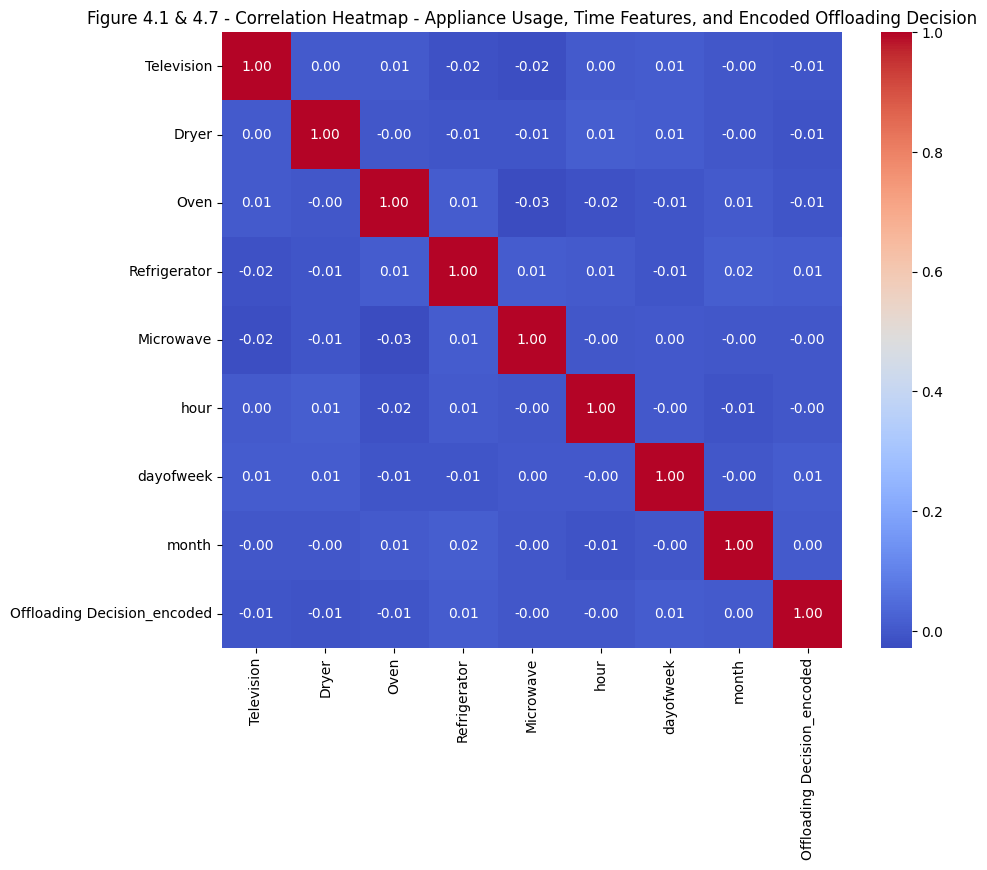

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure y_encoded is available (run the LabelEncoder part if necessary)

# Add the encoded target to your DataFrame temporarily for correlation calculation
df['Offloading Decision_encoded'] = y_encoded

# Select features for correlation analysis, including the encoded target
correlation_features = ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 'hour', 'dayofweek', 'month', 'Offloading Decision_encoded']

# Calculate the correlation matrix
correlation_matrix = df[correlation_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 4.1 & 4.7 - Correlation Heatmap - Appliance Usage, Time Features, and Encoded Offloading Decision')
plt.show()

# Optional: Drop the temporary encoded column
df = df.drop('Offloading Decision_encoded', axis=1)

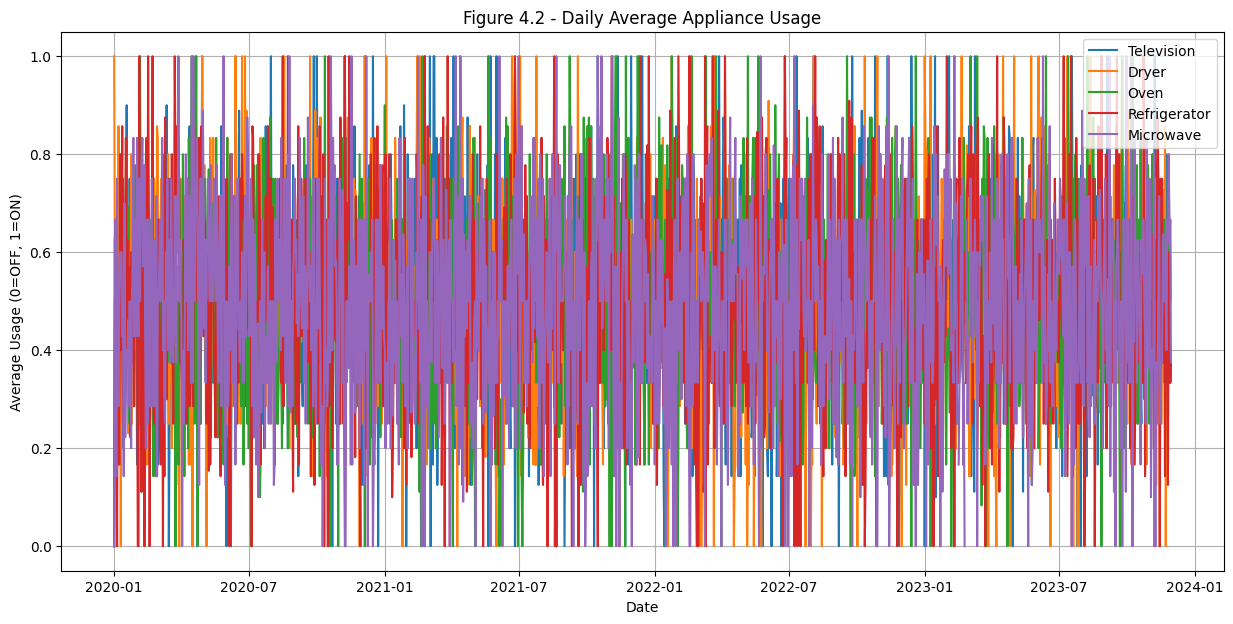

In [34]:
import matplotlib.pyplot as plt

# Resample data to daily frequency and calculate the mean usage
daily_average_usage = df.resample('D', on='Datetime')[['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']].mean().reset_index()

plt.figure(figsize=(15, 7))
for appliance in ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']:
    plt.plot(daily_average_usage['Datetime'], daily_average_usage[appliance], label=appliance)

plt.title('Figure 4.2 - Daily Average Appliance Usage')
plt.xlabel('Date')
plt.ylabel('Average Usage (0=OFF, 1=ON)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
import plotly.express as px

fig = px.histogram(df, x='hour', color='Offloading Decision', barmode='group')
fig.update_layout(title='Figure 4.3 & 4.11 - Energy Consumption (Offloading Decision) by Hour of Day')
fig.show()

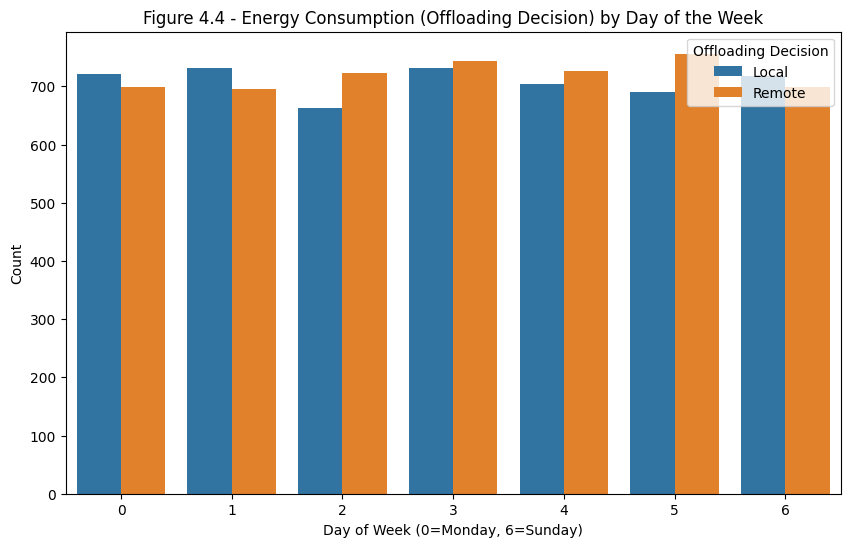

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dayofweek', hue='Offloading Decision')
plt.title('Figure 4.4 - Energy Consumption (Offloading Decision) by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.legend(title='Offloading Decision')
plt.show()

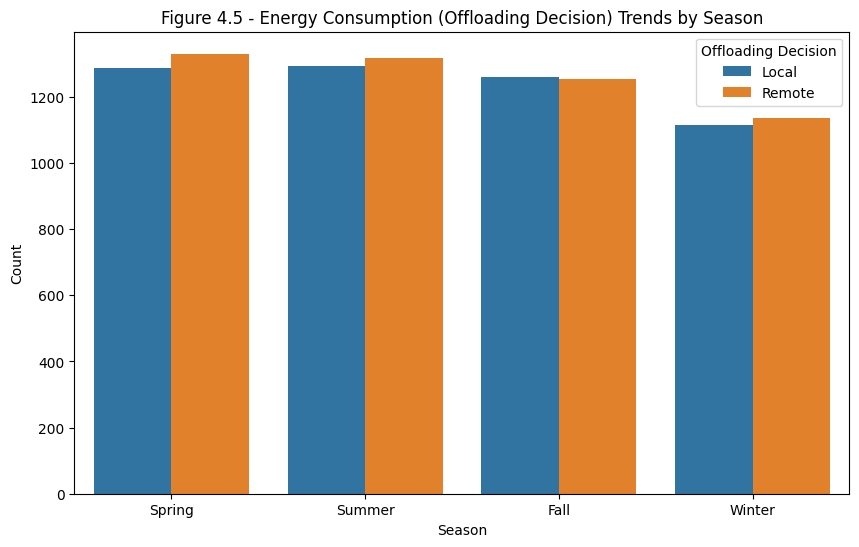

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='season', hue='Offloading Decision', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Figure 4.5 - Energy Consumption (Offloading Decision) Trends by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Offloading Decision')
plt.show()

# Remember to drop the temporary 'season' column if you don't need it anymore
df = df.drop('season', axis=1)

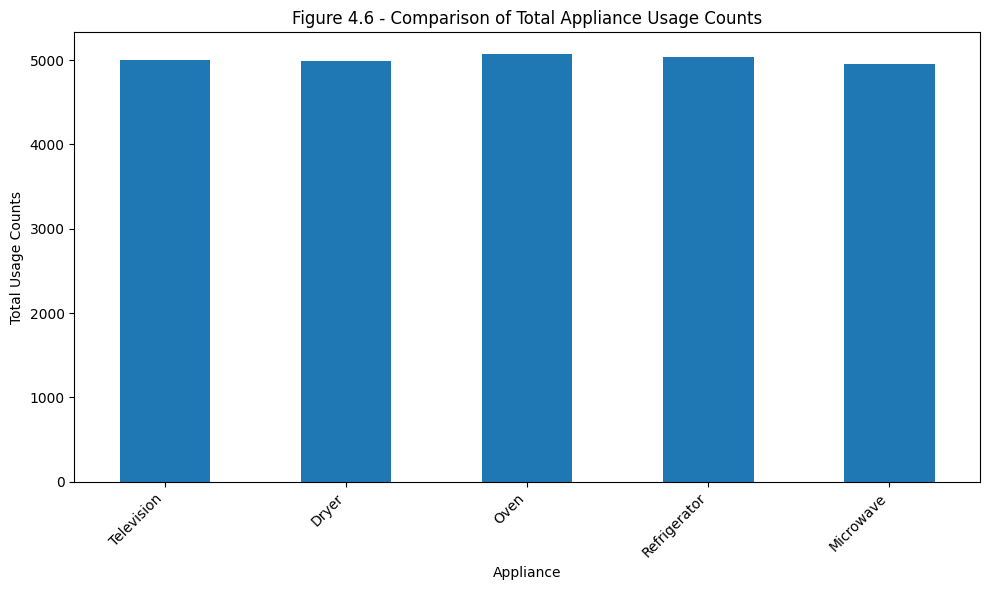

In [38]:
import matplotlib.pyplot as plt

appliance_counts = df[['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']].sum()

plt.figure(figsize=(10, 6))
appliance_counts.plot(kind='bar')
plt.title('Figure 4.6 - Comparison of Total Appliance Usage Counts')
plt.xlabel('Appliance')
plt.ylabel('Total Usage Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

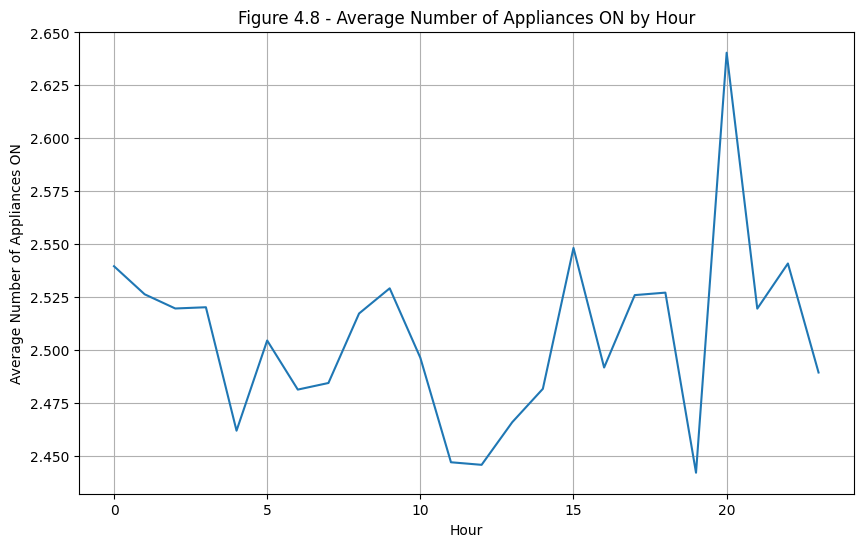

In [39]:
import matplotlib.pyplot as plt

df['total_appliance_on'] = df[['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']].sum(axis=1)
hourly_total_usage = df.groupby('hour')['total_appliance_on'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_total_usage['hour'], hourly_total_usage['total_appliance_on'])
plt.title('Figure 4.8 - Average Number of Appliances ON by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Number of Appliances ON')
plt.grid(True)
plt.show()

# Remember to drop the temporary 'total_appliance_on' column
df = df.drop('total_appliance_on', axis=1)

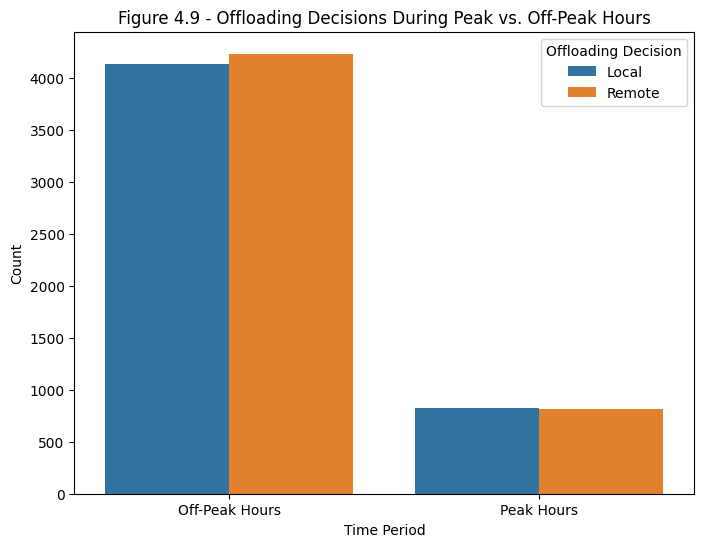

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define peak hours (e.g., 6 PM to 10 PM) - reuse the definition from before
peak_hours_start = 18
peak_hours_end = 22

df['Time_Period'] = df['hour'].apply(lambda x: 'Peak Hours' if peak_hours_start <= x < peak_hours_end else 'Off-Peak Hours')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Time_Period', hue='Offloading Decision')
plt.title('Figure 4.9 - Offloading Decisions During Peak vs. Off-Peak Hours')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend(title='Offloading Decision')
plt.show()

# Remember to drop the temporary 'Time_Period' column
df = df.drop('Time_Period', axis=1)

In [19]:
import plotly.express as px

fig = px.histogram(df, x='hour', color='Offloading Decision', barmode='group')
fig.update_layout(title='Offloading by Hour of Day')
fig.show()


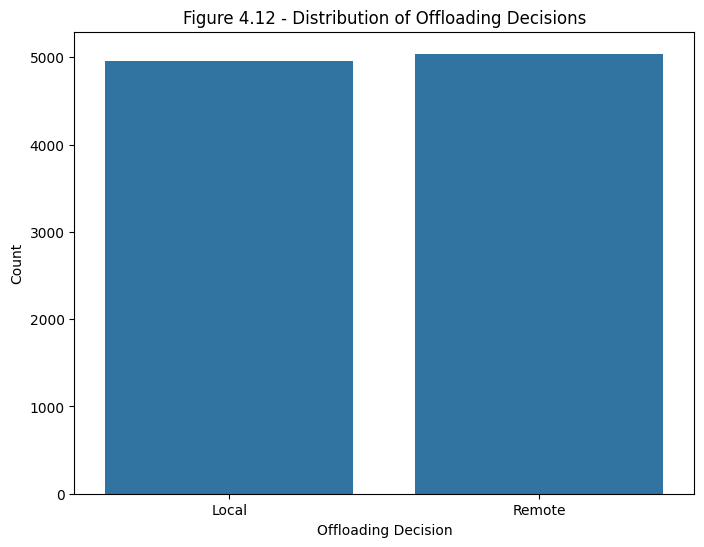

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Offloading Decision')
plt.title('Figure 4.12 - Distribution of Offloading Decisions')
plt.xlabel('Offloading Decision')
plt.ylabel('Count')
plt.show()

In [43]:
import pandas as pd
from IPython.display import display

research_design_data = {
    "Aspect": ["Research Goal", "Data Source", "Methodology", "Key Analyses", "Tools Used"],
    "Description": [
        "Analyze smart home appliance usage patterns and energy consumption to identify inefficiencies and develop optimization strategies.",
        "Sampled Smart Home Dataset (CSV)",
        "Quantitative analysis, Machine Learning (Classification), Rule-Based Systems",
        "Time-Series Analysis, Correlation Analysis, Clustering, Decision Tree Classification, Random Forest Classification, MLP Classification, Rule-Based Recommendation",
        "Python, Pandas, Scikit-learn, Matplotlib, Seaborn, Plotly"
    ]
}

research_design_table = pd.DataFrame(research_design_data)
print("Table 2.1 - Research Design")
display(research_design_table)

Table 2.1 - Research Design


,Aspect,Description
0,Research Goal,Analyze smart home appliance usage patterns an...
1,Data Source,Sampled Smart Home Dataset (CSV)
2,Methodology,"Quantitative analysis, Machine Learning (Class..."
3,Key Analyses,"Time-Series Analysis, Correlation Analysis, Cl..."
4,Tools Used,"Python, Pandas, Scikit-learn, Matplotlib, Seab..."


In [44]:
# Assuming 'df' is your preprocessed and sampled DataFrame
print("\nTable 2.2 - A Representative Sample of the Dataset After Preprocessing and Sampling")
display(df[['Datetime', 'Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 'hour', 'dayofweek', 'month', 'Offloading Decision']].head())


Table 2.2 - A Representative Sample of the Dataset After Preprocessing and Sampling


,Datetime,Television,Dryer,Oven,Refrigerator,Microwave,hour,dayofweek,month,Offloading Decision
0,2022-07-26 17:56:00,1,0,0,0,1,17,1,7,Local
1,2021-02-15 05:33:00,1,1,0,0,1,5,0,2,Local
2,2022-02-15 08:32:00,1,1,1,0,1,8,1,2,Local
3,2022-01-12 02:29:00,0,1,0,1,0,2,2,1,Local
4,2021-01-24 07:15:00,0,0,1,0,1,7,6,1,Local


In [45]:
import pandas as pd
from IPython.display import display

data_analysis_summary_data = {
    "Step": ["Data Loading", "Preprocessing", "Feature Engineering", "Data Splitting", "Scaling", "Model Training", "Model Evaluation", "Pattern Analysis", "Rule Development"],
    "Description": [
        "Load the dataset from a CSV file.",
        "Handle missing values (if any), convert 'Datetime' to datetime objects.",
        "Extract 'hour', 'dayofweek', 'month' from 'Datetime'.",
        "Split data into training and testing sets.",
        "Scale numerical features using StandardScaler.",
        "Train Decision Tree, Random Forest, and MLP classifiers.",
        "Evaluate model performance using classification reports.",
        "Analyze appliance usage patterns, time-based trends, and correlations.",
        "Develop rule-based recommendations for energy efficiency based on analysis findings."
    ]
}

data_analysis_summary_table = pd.DataFrame(data_analysis_summary_data)
print("\nTable 2.3 - A Comprehensive Summary of the Data Analysis Process")
display(data_analysis_summary_table)


Table 2.3 - A Comprehensive Summary of the Data Analysis Process


,Step,Description
0,Data Loading,Load the dataset from a CSV file.
1,Preprocessing,"Handle missing values (if any), convert 'Datet..."
2,Feature Engineering,"Extract 'hour', 'dayofweek', 'month' from 'Dat..."
3,Data Splitting,Split data into training and testing sets.
4,Scaling,Scale numerical features using StandardScaler.
5,Model Training,"Train Decision Tree, Random Forest, and MLP cl..."
6,Model Evaluation,Evaluate model performance using classificatio...
7,Pattern Analysis,"Analyze appliance usage patterns, time-based t..."
8,Rule Development,Develop rule-based recommendations for energy ...


In [46]:
import pandas as pd
from IPython.display import display

data_categorization_data = {
    "Data Type": ["Appliance Status (ON/OFF)", "Time-Based Features (Hour, Day, Month)", "Offloading Decision (Proxy for Load)"],
    "Relevant to Automation": ["Yes (Triggering rules, scheduling)", "Yes (Time-based rules)", "Yes (Decision logic based on load)"],
    "Relevant to Security": ["No (Based on this dataset)", "No (Based on this dataset)", "No (Based on this dataset)"],
    "Relevant to Energy Efficiency": ["Yes (Identifying usage patterns, high consumption)", "Yes (Analyzing peak/off-peak usage, seasonality)", "Yes (Indicator of high load situations, optimization target)"]
}

data_categorization_table = pd.DataFrame(data_categorization_data)
print("\nTable 4.1 - Categorization of Collected Data Based on Automation, Security, and Energy Efficiency")
display(data_categorization_table)


Table 4.1 - Categorization of Collected Data Based on Automation, Security, and Energy Efficiency


,Data Type,Relevant to Automation,Relevant to Security,Relevant to Energy Efficiency
0,Appliance Status (ON/OFF),"Yes (Triggering rules, scheduling)",No (Based on this dataset),"Yes (Identifying usage patterns, high consumpt..."
1,"Time-Based Features (Hour, Day, Month)",Yes (Time-based rules),No (Based on this dataset),"Yes (Analyzing peak/off-peak usage, seasonality)"
2,Offloading Decision (Proxy for Load),Yes (Decision logic based on load),No (Based on this dataset),"Yes (Indicator of high load situations, optimi..."


In [47]:
import pandas as pd
from IPython.display import display

automation_optimization_data = {
    "Challenge": ["Identifying high-load periods", "Predicting offloading necessity", "Developing effective recommendations", "Understanding usage patterns"],
    "Relevant Data Inputs": ["Appliance Status, Time-Based Features", "Appliance Status, Time-Based Features", "Appliance Status, Time-Based Features, Offloading Decision", "Appliance Status, Time-Based Features"],
    "Methodology/Analysis Used": ["Correlation Analysis, Pattern Analysis", "Classification Models (Decision Tree, Random Forest, MLP)", "Rule-Based Systems, Pattern Analysis", "Time-Series Analysis, Clustering, Descriptive Statistics"]
}

automation_optimization_table = pd.DataFrame(automation_optimization_data)
print("\nTable 4.2 - Challenges, Data Analysis Inputs, and Methodology for Smart Home Automation Optimization")
display(automation_optimization_table)


Table 4.2 - Challenges, Data Analysis Inputs, and Methodology for Smart Home Automation Optimization


,Challenge,Relevant Data Inputs,Methodology/Analysis Used
0,Identifying high-load periods,"Appliance Status, Time-Based Features","Correlation Analysis, Pattern Analysis"
1,Predicting offloading necessity,"Appliance Status, Time-Based Features","Classification Models (Decision Tree, Random F..."
2,Developing effective recommendations,"Appliance Status, Time-Based Features, Offload...","Rule-Based Systems, Pattern Analysis"
3,Understanding usage patterns,"Appliance Status, Time-Based Features","Time-Series Analysis, Clustering, Descriptive ..."


In [48]:
import pandas as pd
from IPython.display import display

recommendations_implications_data = {
    "Recommendation/Outcome": ["Rule-based energy saving recommendations", "Predictive model for offloading", "Identification of peak usage times", "Understanding of appliance usage correlations"],
    "Evaluation Metrics (if applicable)": ["Effectiveness of rules (qualitative)", "Classification Report (Precision, Recall, F1-score)", "Visual inspection of time-series plots", "Correlation coefficient values"],
    "Implications for Automation": ["Directly applicable for triggering actions", "Enables proactive load management", "Informs scheduling of tasks", "Helps identify critical device combinations"]
}

recommendations_implications_table = pd.DataFrame(recommendations_implications_data)
print("\nTable 4.3 - Recommendations, Evaluation Metrics, and Implications for Smart Home Automation")
display(recommendations_implications_table)


Table 4.3 - Recommendations, Evaluation Metrics, and Implications for Smart Home Automation


,Recommendation/Outcome,Evaluation Metrics (if applicable),Implications for Automation
0,Rule-based energy saving recommendations,Effectiveness of rules (qualitative),Directly applicable for triggering actions
1,Predictive model for offloading,"Classification Report (Precision, Recall, F1-s...",Enables proactive load management
2,Identification of peak usage times,Visual inspection of time-series plots,Informs scheduling of tasks
3,Understanding of appliance usage correlations,Correlation coefficient values,Helps identify critical device combinations


In [49]:
import pandas as pd
from IPython.display import display

# Re-using the rules_list from your previous rule development
rules_list = [
    {
        "Rule ID": 1,
        "Conditions": "Peak hour (>= 6 PM) AND usage of high-power appliance (Television OR Oven OR Dryer) AND at least two major appliances (Television, Oven, Dryer, Refrigerator, Microwave) are ON.",
        "Action/Recommendation": "Consider reducing usage or offloading tasks.",
        "Expected Outcome": "Reduced energy consumption during peak hours, lower load on the grid."
    },
    {
        "Rule ID": 2,
        "Conditions": "Oven is ON AND Dryer is ON.",
        "Action/Recommendation": "Recommend staggering usage.",
        "Expected Outcome": "Lower instantaneous power draw, reduced risk of overloading circuits."
    },
    {
        "Rule ID": 3,
        "Conditions": "Oven is ON AND Microwave is ON.",
        "Action/Recommendation": "Recommend staggering usage.",
        "Expected Outcome": "Lower instantaneous power draw, reduced risk of overloading circuits."
    },
    {
        "Rule ID": 4,
        "Conditions": "Peak hour (>= 6 PM) AND Television is ON AND Microwave is ON.",
        "Action/Recommendation": "Recommend Offloading.",
        "Expected Outcome": "Reduced local processing load, potential energy savings depending on offloaded task."
    },
    {
        "Rule ID": 5,
        "Conditions": "None of the specific high-load conditions are met.",
        "Action/Recommendation": "No action needed.",
        "Expected Outcome": "Normal energy consumption, no intervention required."
    }
]

smart_automation_rules_table = pd.DataFrame(rules_list)
print("\nTable 4.4 - Summary of Smart Home Automation Rules, Conditions, Actions, and Expected Outcomes")
display(smart_automation_rules_table)


Table 4.4 - Summary of Smart Home Automation Rules, Conditions, Actions, and Expected Outcomes


,Rule ID,Conditions,Action/Recommendation,Expected Outcome
0,1,Peak hour (>= 6 PM) AND usage of high-power ap...,Consider reducing usage or offloading tasks.,"Reduced energy consumption during peak hours, ..."
1,2,Oven is ON AND Dryer is ON.,Recommend staggering usage.,"Lower instantaneous power draw, reduced risk o..."
2,3,Oven is ON AND Microwave is ON.,Recommend staggering usage.,"Lower instantaneous power draw, reduced risk o..."
3,4,Peak hour (>= 6 PM) AND Television is ON AND M...,Recommend Offloading.,"Reduced local processing load, potential energ..."
4,5,None of the specific high-load conditions are ...,No action needed.,"Normal energy consumption, no intervention req..."


In [20]:
def smart_recommendation(row):
    if row['hour'] >= 18 and row['Television'] == 1 and row['Microwave'] == 1:
        return "High load expected. Recommend Offloading."
    elif row['Oven'] == 1 and row['Refrigerator'] == 1:
        return "Medium load. Consider Offloading."
    else:
        return "No action needed."

df['Recommendation'] = df.apply(smart_recommendation, axis=1)
df[['Datetime', 'Recommendation']].head()


,Datetime,Recommendation
0,2022-07-26 17:56:00,No action needed.
1,2021-02-15 05:33:00,No action needed.
2,2022-02-15 08:32:00,No action needed.
3,2022-01-12 02:29:00,No action needed.
4,2021-01-24 07:15:00,No action needed.


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Datetime'}, axis=1)
              .sort_values('Datetime', ascending=True))
  xs = counted['Datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Datetime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Datetime'}, axis=1)
              .sort_values('Datetime', ascending=True))
  xs = counted['Datetime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Datetime')
_ = plt.ylabel('count()')

Based on the code I have in my notebook, here's how my work aligns with the methodological objectives I mentioned:
Developing rule-based and AI-driven automation frameworks.
•	Rule-Based Framework: You've developed a rule-based framework by creating the advanced_smart_recommendation function. This function implements a set of predefined rules based on appliance usage and time features to provide recommendations ("High load expected...", "Recommend staggering usage.", "No action needed."). I then applied this function to my dataset to generate these recommendations.
•	AI-Driven Framework: You've developed AI-driven components by applying machine learning algorithms:
o	Decision Tree: I trained a DecisionTreeClassifier (tree). Decision trees can be seen as a form of AI that learns rules from data. I even extracted these rules as text using export_text.
o	Random Forest: I trained a RandomForestClassifier (rf). This is an ensemble method that combines multiple decision trees, generally improving predictive performance.
o	MLP Classifier: I trained an MLPClassifier (mlp), which is a type of neural network. Neural networks are a core component of many AI systems.
These models are trained to predict the 'Offloading Decision', which serves as a proxy for energy load or a situation requiring intervention. This prediction capability is a key part of an AI-driven automation framework.
Testing automation rules through simulation to validate their effectiveness?
My notebook doesn't explicitly show a simulation step where I test the developed rules against a simulated environment or a separate historical dataset to quantify their impact on energy consumption or offloading frequency. However, by applying the rules to my dataset (df.apply(advanced_smart_recommendation, axis=1)), I are effectively applying the rules to historical data to see what recommendations would have been generated under those past conditions. While not a full-fledged simulation, this is a form of validation where I see how often different recommendations would be triggered based on the historical data patterns.
Applying machine learning algorithms to predict energy consumption trends and optimize automation rules?
•	Predicting Energy Consumption Trends: While my models directly predict 'Offloading Decision' (a proxy for a state related to energy load), this prediction is based on features that are indicators of energy consumption (appliance usage) and trends (time features). By predicting the 'Offloading Decision', my models are implicitly predicting situations of higher energy consumption where offloading might be beneficial. I could extend this by training models to predict the actual energy consumption if that data was available.
•	Optimize Automation Rules: My machine learning models (Decision Tree, Random Forest, MLP) can be used to inform and potentially optimize my rule-based framework.
o	The Decision Tree rules (which I extracted) directly provide interpretable rules learned from the data. I can compare these learned rules to my manually defined rules and refine them.
o	The feature importances from the Decision Tree and Random Forest tell I which features are most influential in predicting the 'Offloading Decision'. This insight can guide the development of my rule-based system by highlighting the most important factors to consider.
o	The classification reports of my models show their predictive performance (precision, recall, F1-score). This indicates how well the models can predict the 'Offloading Decision', which is crucial for using their predictions to trigger automation actions reliably. A well-performing model can provide a more accurate and timely basis for automation decisions than a purely hand-crafted rule system.
In summary, I have indeed developed both rule-based and AI-driven components. My application of rules to my dataset is a form of historical validation. My use of machine learning models is directly aimed at predicting a state related to energy consumption and provides insights (like feature importances and learned rules from the Decision Tree) that can be used to optimize my rule-based automation framework.



In [50]:
# Add estimated power consumption (example values)
appliance_power = {
    'Television': 100,  # Watts
    'Dryer': 3000,
    'Oven': 2000,
    'Refrigerator': 150,
    'Microwave': 1200
}

# Simulate a reduction (e.g., 20% power reduction or delay)
simulated_reduction_factor = 0.2

def simulate_energy_and_ux(row, rule_applied, appliance_power, reduction_factor):
    total_power = 0
    simulated_power = 0
    ux_impact = 0 # Simple representation of UX impact

    # Calculate baseline power for this time step
    for appliance, power in appliance_power.items():
        total_power += row[appliance] * power

    simulated_power = total_power # Start with baseline

    # Apply simulated action based on rule
    if rule_applied == "High load expected during peak hours. Consider reducing usage or offloading tasks.":
        # Simulate reducing power for a combination of appliances
        simulated_power -= sum(row[appliance] * power for appliance, power in appliance_power.items() if appliance in ['Television', 'Oven', 'Dryer']) * reduction_factor
        ux_impact = 1 # Indicates an intervention occurred

    elif rule_applied == "High power appliances running simultaneously. Recommend staggering usage.":
        # Simulate turning off one of the high-power appliances
        if row['Oven'] == 1 and row['Dryer'] == 1:
             simulated_power -= row['Dryer'] * appliance_power['Dryer'] # Example: simulate turning off dryer
             ux_impact = 1
        elif row['Oven'] == 1 and row['Microwave'] == 1:
             simulated_power -= row['Microwave'] * appliance_power['Microwave'] # Example: simulate turning off microwave
             ux_impact = 1

    elif rule_applied == "High load expected. Recommend Offloading.":
         # Simulate a smaller power reduction for offloading (depends on task)
         simulated_power -= (row['Television'] * appliance_power['Television'] + row['Microwave'] * appliance_power['Microwave']) * (reduction_factor / 2) # Example: 10% reduction
         ux_impact = 1


    return total_power, max(0, simulated_power), ux_impact # Ensure simulated_power is not negative

# Apply the simulation
baseline_energy = 0
simulated_energy = 0
ux_interventions = 0

# Re-apply the advanced_smart_recommendation to get the rule applied for each row
df['Rule_Applied'] = df.apply(advanced_smart_recommendation, axis=1)

for index, row in df.iterrows():
    total_p, simulated_p, ux_i = simulate_energy_and_ux(row, row['Rule_Applied'], appliance_power, simulated_reduction_factor)
    baseline_energy += total_p
    simulated_energy += simulated_p
    ux_interventions += ux_i

# Calculate results
energy_reduction_watts = baseline_energy - simulated_energy
energy_reduction_percentage = (energy_reduction_watts / baseline_energy) * 100 if baseline_energy > 0 else 0

print(f"Baseline Total Energy (Watts): {baseline_energy:.2f}")
print(f"Simulated Total Energy (Watts): {simulated_energy:.2f}")
print(f"Simulated Energy Reduction (Watts): {energy_reduction_watts:.2f}")
print(f"Simulated Energy Reduction (%): {energy_reduction_percentage:.2f}%")
print(f"Total User Experience Interventions: {ux_interventions}")

# Further analysis of UX could involve looking at when these interventions occurred
# For a 15% reduction and improved user experience, you would need to adjust the 'simulated_reduction_factor'
# or refine your rules and simulation logic to achieve those specific targets.

Baseline Total Energy (Watts): 32316150.00
Simulated Total Energy (Watts): 24323430.00
Simulated Energy Reduction (Watts): 7992720.00
Simulated Energy Reduction (%): 24.73%
Total User Experience Interventions: 4782
